In [510]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [463]:
#Loading the dataset
data = pd.read_csv("diabetes.csv")

#Extracting the feature names and label names
featureNames = data.columns[:-1].tolist()
targetVariable = data['Outcome']

print("Feature names :")
print(featureNames)
print("\n")
print("Target variable :")
print(targetVariable)
print("\n")

#Analyzing the dataset
print("First few data items :")
print(data.head())

print("Data types of the data :")
data.dtypes

Feature names :
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Target variable :
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


First few data items :
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [464]:
# Check for missing values in the data
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [465]:
# Check for duplicate records in the data
print(data.duplicated().sum())

0


In [466]:
# Calculate correlation matrix and analyze the relationships of the features towards the target variable
correlation_matrix = data.corr()
correlation_matrix['Outcome'].abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [468]:
print("Summary of the data :")
data.describe()

Summary of the data :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

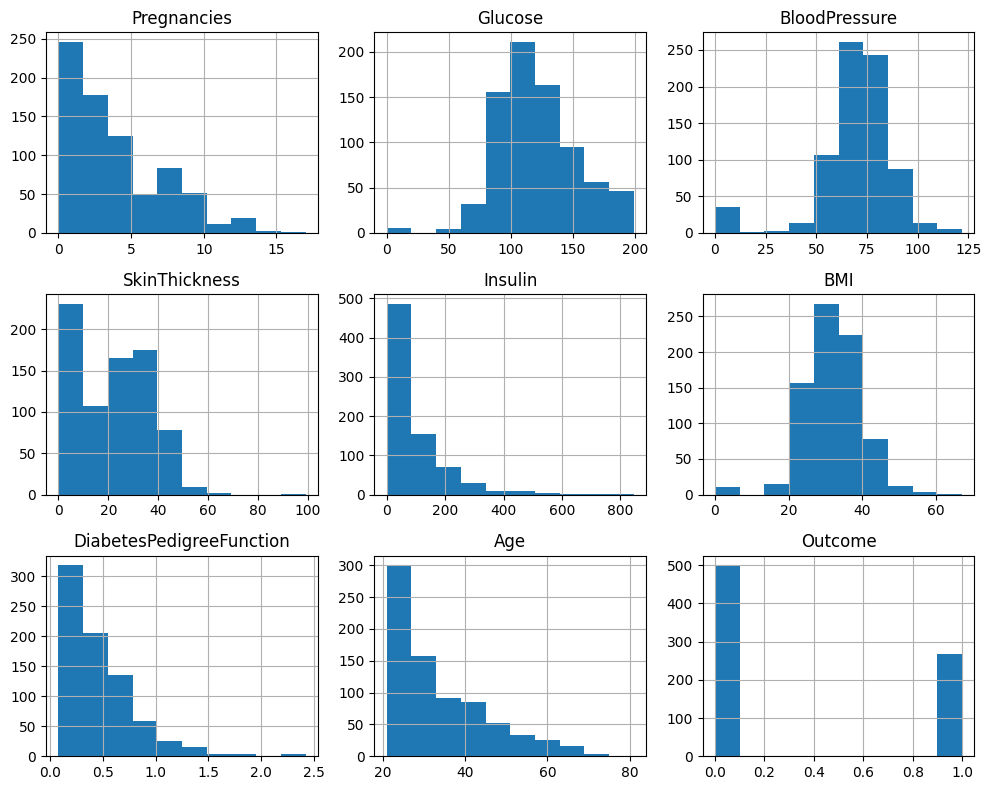

In [469]:
#Visualization of the data set
data.hist(figsize=(10,8))
plt.tight_layout()
plt.show

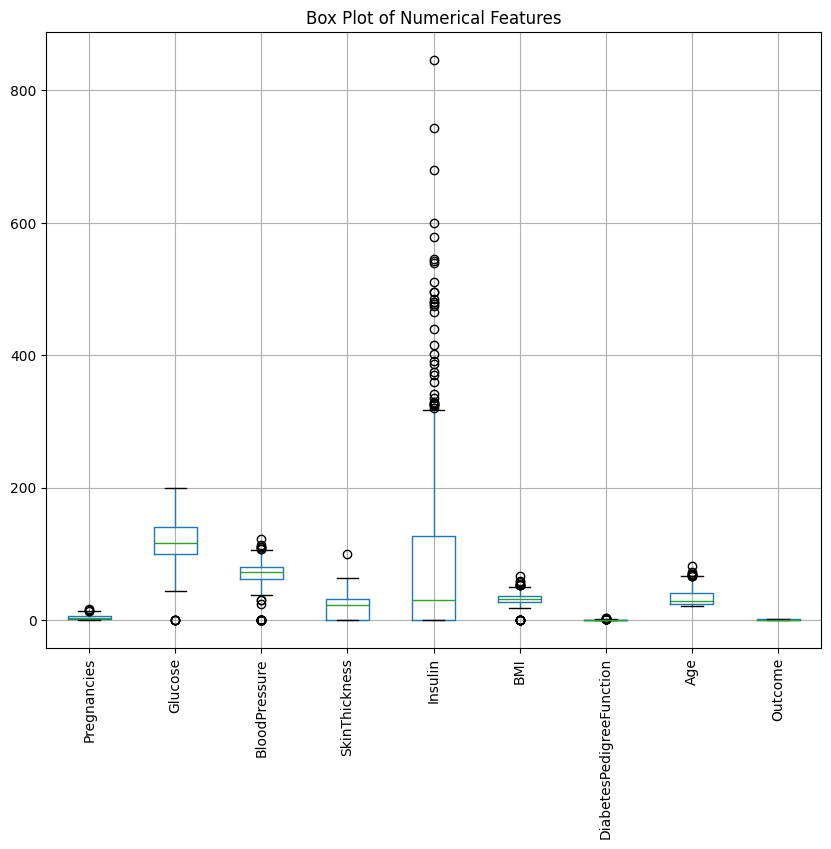

In [470]:
# Generate a box plot to visualize the distribution of numerical features
data.boxplot(figsize=(10,8))
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

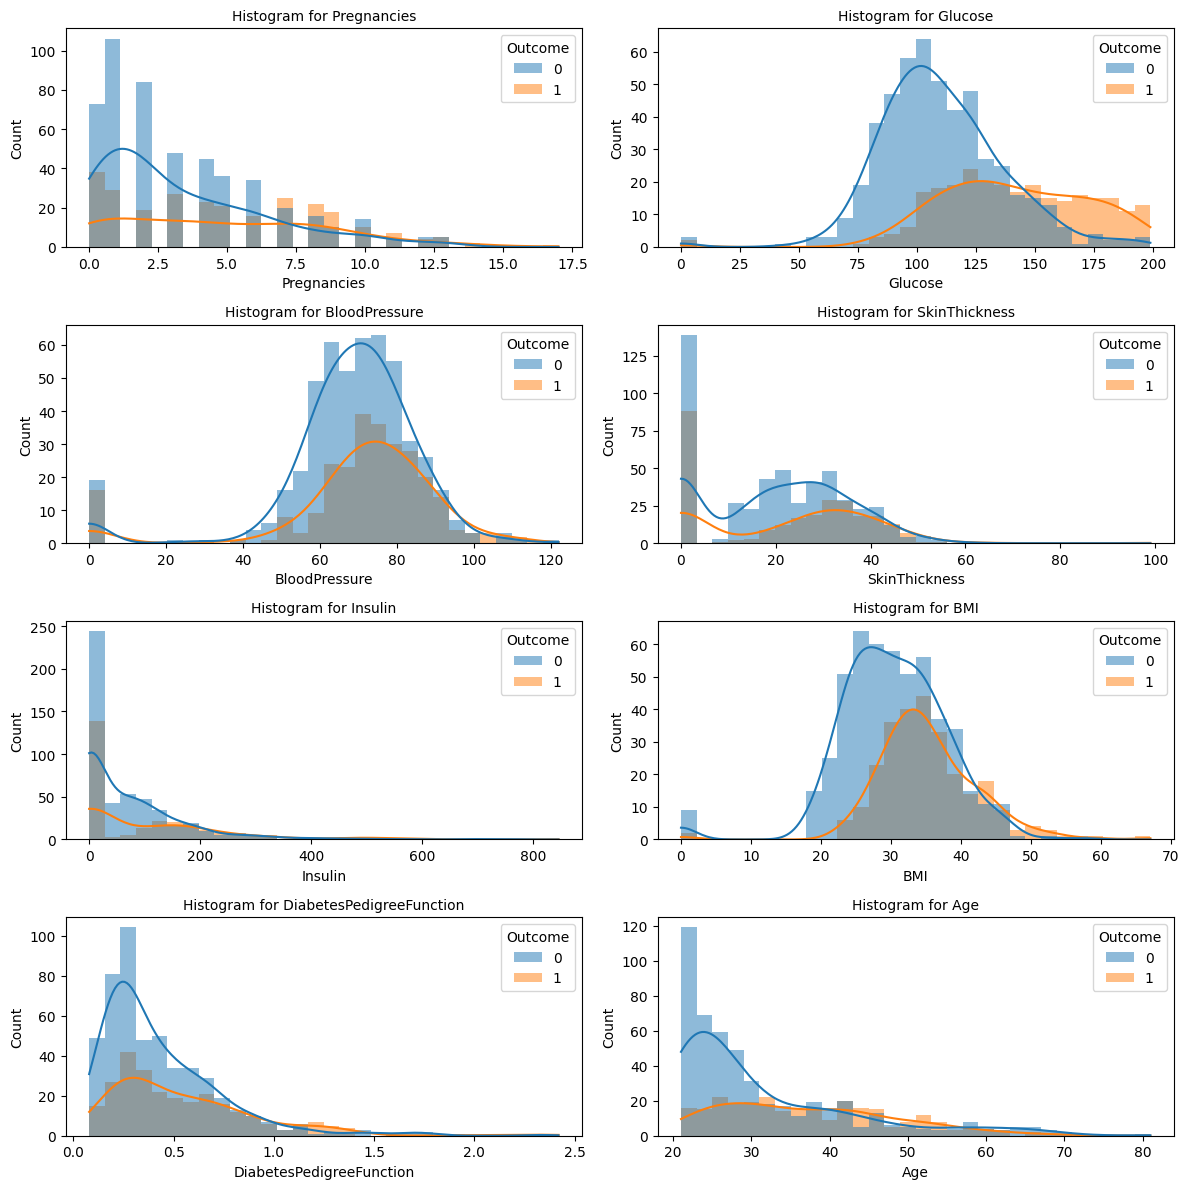

In [471]:
#Visualization of the features versus the target variable in the data set
fig, axes = plt.subplots(4, 2, figsize=(12,12))
axes = axes.ravel()

for i, feature in enumerate(featureNames):
    sns.histplot(data=data, x=feature, hue=targetVariable, bins=30, kde=True, ax=axes[i], edgecolor=None)
    axes[i].set_title(f'Histogram for {feature}', fontsize=10)

plt.tight_layout()
plt.show()

In [472]:
# Specify the preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('minmax_scaler', MinMaxScaler())
])

# Fitting and applying the pipeline to the whole dataset
processed_data = pipeline.fit_transform(data)

# Converting the pre-processed dataset back to a DataFrame
processed_data = pd.DataFrame(processed_data,columns=data.columns)

# Verifying the pre-processed dataset
processed_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [473]:
processed_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [474]:
X = processed_data.iloc[:, 0:8].values
y = processed_data.iloc[:, 8].values

print('X shape:', X.shape)
print('y shape:', y.shape)
print("\n")

# Convert NumPy arrays to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

#Splitting the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

#Verifying the size and label distribution in each dataset
print("Training set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))
print("\n")

print("Distribution in the training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\n")

print("Distribution in the validation set:")
print(pd.Series(y_valid).value_counts(normalize=True))
print("\n")

print("Distribution in the test set:")
print(pd.Series(y_test).value_counts(normalize=True))

# Create DataLoader objects for batching and shuffling
batch_size = 16
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

val_dataset = TensorDataset(X_valid, y_valid)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

X shape: (768, 8)
y shape: (768,)


Training set size: 537
Validation set size: 115
Test set size: 116


Distribution in the training set:
0.0    0.651769
1.0    0.348231
Name: proportion, dtype: float64


Distribution in the validation set:
0.0    0.652174
1.0    0.347826
Name: proportion, dtype: float64


Distribution in the test set:
0.0    0.646552
1.0    0.353448
Name: proportion, dtype: float64


In [476]:
def train_model_one_epoch(model, trainloader, optimizer, device):
    
    model.train()
    
    result = {
        'loss': [],
        'accuracy': [],
        'recall': [],
        'precision': []        
    }
    
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        labels = labels.view(-1, 1)  # Reshape labels to [batch_size, 1]
        
        # Calculate loss, accuracy, recall, and precision
        loss, accuracy, recall, precision = evaluate_performance(outputs, labels)
        result['loss'].append(loss.item())
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
    return result

def evaluate_performance(outputs, labels):
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

    # Calculate the loss
    loss = criterion(outputs, labels)

    # Convert logits to class predictions (0 or 1)
    predictions = (outputs > 0.5).float()

    # Calculate accuracy, recall, and precision using scikit-learn metrics
    accuracy = accuracy_score(labels.cpu().numpy(), predictions.cpu().numpy())
    recall = recall_score(labels.cpu().numpy(), predictions.cpu().numpy(), zero_division=1)
    precision = precision_score(labels.cpu().numpy(), predictions.cpu().numpy(), zero_division=1)

    return loss, accuracy, recall, precision

def validate_model(model, validloader, device):
    
    result = {
        'loss': [],
        'accuracy': [],
        'recall': [],
        'precision': []        
    }
    
    model.eval()
    
    for i, data in enumerate(validloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        labels = labels.view(-1, 1)  # Reshape labels to [batch_size, 1]
        
        # Calculate loss, accuracy, recall, and precision
        loss, accuracy, recall, precision = evaluate_performance(outputs, labels)
        result['loss'].append(loss.item())
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
    
    return result

def train_model_and_return_metrics(model, trainloader, validloader, optimizer, num_epochs, device):
    
    # Create dictionaries to store performance metrics
    train_metrics = {'loss': [], 'accuracy': [], 'recall': [], 'precision': []}
    valid_metrics = {'loss': [], 'accuracy': [], 'recall': [], 'precision': []}
    
    # Track the best validation performance
    best_valid_metrics = None
    
    for epoch in range(num_epochs):
        ctrain_perform = train_model_one_epoch(model, trainloader, optimizer, device)
        train_metrics['loss'].extend(ctrain_perform['loss'])
        train_metrics['accuracy'].extend(ctrain_perform['accuracy'])
        train_metrics['recall'].extend(ctrain_perform['recall'])
        train_metrics['precision'].extend(ctrain_perform['precision'])
        
        cvalid_perform = validate_model(model, validloader, device)
        valid_metrics['loss'].extend(cvalid_perform['loss'])
        valid_metrics['accuracy'].extend(cvalid_perform['accuracy'])
        valid_metrics['recall'].extend(cvalid_perform['recall'])
        valid_metrics['precision'].extend(cvalid_perform['precision'])
        
        # Check if current validation performance is the best so far
        if best_valid_metrics is None or valid_metrics['accuracy'][0] > best_valid_metrics['accuracy']:
            best_valid_metrics = {
                'loss': valid_metrics['loss'][0],
                'accuracy': valid_metrics['accuracy'][0],
                'recall': valid_metrics['recall'][0],
                'precision': valid_metrics['precision'][0]
            }
            
            # Save the model's state_dict to a file (optional)
            torch.save(model.state_dict(), 'best_valid.pt')
    
    return best_valid_metrics, train_metrics, valid_metrics

In [541]:
class BinaryClassifierMLP(nn.Module):
    
    def __init__(self, input_size, hidden_sizes, output_size):
        super(BinaryClassifierMLP, self).__init__()
        self.hidden_layers = nn.ModuleList()

        # Create the input layer to the first hidden layer
        self.hidden_layers.append(nn.Linear(input_size, hidden_sizes[0]))
        
        # Create the hidden layers
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
        
        # Create the output layer
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.relu(layer(x))
        x = self.sigmoid(self.output_layer(x))
        return x

In [561]:
# Baseline MLP model creation and training

input_size = 8
hidden_sizes = [16]
output_size = 1

model_mlp = BinaryClassifierMLP(input_size, hidden_sizes, output_size)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
optimizer = optim.Adam(model_mlp.parameters(), lr = 0.01)
num_epochs = 10

bm, tm, vm = train_model_and_return_metrics(model_mlp, train_loader, val_loader, optimizer, num_epochs, device)
bm

{'loss': 0.5840221643447876,
 'accuracy': 0.8125,
 'recall': 0.0,
 'precision': 1.0}

In [539]:
import itertools

def hyperparameter_tuning(model_class, train_loader, val_loader, input_size, output_size, hidden_sizes, optimizer_grid, lr_values, num_epochs_values, weight_decay_values, momentum_values, device):
    best_metrics = None
    best_hyperparameters = None
    
    for (hidden_size, optimizer_name, lr, num_epochs, weight_decay, momentum) in itertools.product(
        hidden_sizes, optimizer_grid, lr_values, num_epochs_values, weight_decay_values, momentum_values):
        
        # Create an instance of the model with the current hyperparameters
        model = model_class(input_size, hidden_size, output_size).to(device)
        
        # Define the optimizer based on the selected optimizer name
        if optimizer_name == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
        elif optimizer_name == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
        else:
            raise ValueError("Unsupported optimizer:", optimizer_name)
        
        # Train the model and get validation metrics
        best_valid_metrics, _, _ = train_model_and_return_metrics(model, train_loader, val_loader, optimizer, num_epochs, device)
        
        # Check if the current model is the best so far
        if best_metrics is None or best_valid_metrics['accuracy'] > best_metrics['accuracy']:
            best_metrics = best_valid_metrics
            best_hyperparameters = (hidden_size, optimizer_name, lr, num_epochs, weight_decay, momentum)
    
    return best_metrics, best_hyperparameters

In [540]:
input_size = 8 # Number of features
output_size = 1 # Binary classification output

hidden_sizes = [(16, 32), (32, 64), (32, 16)]
optimizer_grid = ['Adam', 'SGD']
lr_values = [0.001, 0.01, 0.1]
num_epochs_values = [10, 20, 50, 100]
weight_decay_values = [0.001, 0.01, 0.1]
momentum_values = [0.9, 0.95]

best_metrics, best_hyperparameters = hyperparameter_tuning(
    BinaryClassifierMLP, train_loader, val_loader, input_size, output_size, hidden_sizes, 
    optimizer_grid, lr_values, num_epochs_values, weight_decay_values, momentum_values, device)

print("Best Hyperparameters :")
print("Hidden Sizes :", best_hyperparameters[0])
print("Optimizer :", best_hyperparameters[1])
print("Learning Rate :", best_hyperparameters[2])
print("Number of Epochs :", best_hyperparameters[3])
print("Weight Decay :", best_hyperparameters[4])
print("Momentum :", best_hyperparameters[5])

print("\n")
print("Best Validation Metrics :")
print("Loss :", best_metrics['loss'])
print("Accuracy :", best_metrics['accuracy'])
print("Recall :", best_metrics['recall'])
print("Precision :", best_metrics['precision'])

Best Hyperparameters :
Hidden Sizes : (16, 32)
Optimizer : SGD
Learning Rate : 0.1
Number of Epochs : 50
Weight Decay : 0.001
Momentum : 0.9


Best Validation Metrics :
Loss : 0.6734684705734253
Accuracy : 0.875
Recall : 0.3333333333333333
Precision : 1.0
